In [1]:
NAME = 'Ahmed Hanif - 60301085'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats
import numpy as np
import re

from quantile_forest import RandomForestQuantileRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,  precision_score, recall_score, f1_score, auc, roc_curve
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, PoissonRegressor
from sklearn.svm import SVC

<b> Functions Utilized</b>

In [3]:
def calculate_bin_edges(column, bin_boundary):
    return np.arange(0,column.max() + bin_boundary, bin_boundary)

def normalize(x, condition = False):
    return (x - x.min()) / (x.max() - x.min())

def denormalize(original, normalized):
    return normalized * (original.max() - original.min()) + original.min() # (TracyRenee, n.d.)
def logtrans(x, inverse= False):
    if inverse == False:
        return np.log(x)
    elif inverse == True:
        return np.power(2,x)
    

    

In [4]:
df_verOne = pd.read_csv('Breast_Cancer-Winter2024.csv')
df_verOne.columns = df_verOne.columns.str.replace(' ','_').str.lower()
df_verOne.rename(columns = {'t_stage_' : 't_stage', 'reginol_node_positive': 'regional_node_positive', '6th_stage': 'sixth_stage'}, inplace = True)
print('Number Of Rows:',df_verOne.shape[0])
print('Duplicated Rows:', df_verOne.duplicated().sum())
df_verOne.drop_duplicates(inplace=True)
df_verOne.sample(50)

Number Of Rows: 4024
Duplicated Rows: 1


,age,race,marital_status,t_stage,n_stage,sixth_stage,differentiate,grade,a_stage,tumor_size,estrogen_status,progesterone_status,regional_node_examined,regional_node_positive,survival_months,status
4007,44,White,Single,T4,N1,IIIB,Moderately differentiated,2,Regional,21.0,Positive,Positive,10,1,75.0,Alive
1720,69,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,18.0,Positive,Positive,20,1,60.0,Alive
1131,49,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,16.0,Positive,Positive,4,2,62.0,Alive
1375,40,Black,Single,T3,N2,IIIA,Moderately differentiated,2,Regional,82.0,Positive,Positive,10,7,36.0,Dead
3377,65,White,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,41.0,Positive,Positive,16,2,61.0,Alive
3084,58,White,Married,T2,N1,IIB,Well differentiated,1,Regional,35.0,Positive,Positive,9,3,49.0,Alive
3380,42,White,Married,T1,N1,IIA,Well differentiated,1,Regional,13.0,Positive,Positive,9,1,67.0,Alive
3390,49,White,Married,T1,N2,IIIA,Moderately differentiated,2,Regional,18.0,Positive,Positive,6,5,53.0,Dead
3724,59,White,Divorced,T2,N3,IIIC,Well differentiated,1,Distant,25.0,Positive,Positive,11,1,104.0,Alive
85,46,White,Married,T2,N3,IIIC,Poorly differentiated,3,Regional,40.0,Negative,Negative,12,11,71.0,Alive


In [5]:
print(df_verOne['a_stage'].value_counts())
print(df_verOne['sixth_stage'].value_counts())

a_stage
Regional    3931
Distant       92
Name: count, dtype: int64
sixth_stage
IIA     1304
IIB     1130
IIIA    1050
IIIC     472
IIIB      67
Name: count, dtype: int64


<b>Q1 - a </b>

In [73]:
df_verOne[['status','race']].groupby('status').value_counts(normalize=True)

status  race 
Alive   White    0.851776
        Other    0.084238
        Black    0.063986
Dead    White    0.827922
        Black    0.118506
        Other    0.053571
Name: proportion, dtype: float64

In [74]:
df_verOne.groupby(['status'])['race'].value_counts(normalize=True)

status  race 
Alive   White    0.851776
        Other    0.084238
        Black    0.063986
Dead    White    0.827922
        Black    0.118506
        Other    0.053571
Name: proportion, dtype: float64

In [6]:
total_count_of_each_race = df_verOne['race'].value_counts()
print(total_count_of_each_race)

race
White    3412
Other     320
Black     291
Name: count, dtype: int64


In [7]:
death_count_of_each_race = df_verOne['race'][df_verOne['status'] == 'Dead'].value_counts()
print(death_count_of_each_race)

race
White    510
Black     73
Other     33
Name: count, dtype: int64


In [8]:
total_death_cases = (df_verOne['status'] == 'Dead').sum()
print(total_death_cases)

616


In [9]:
death_percentage_of_each_race = round((death_count_of_each_race / total_death_cases) * 100,2)
print(death_percentage_of_each_race)

race
White    82.79
Black    11.85
Other     5.36
Name: count, dtype: float64


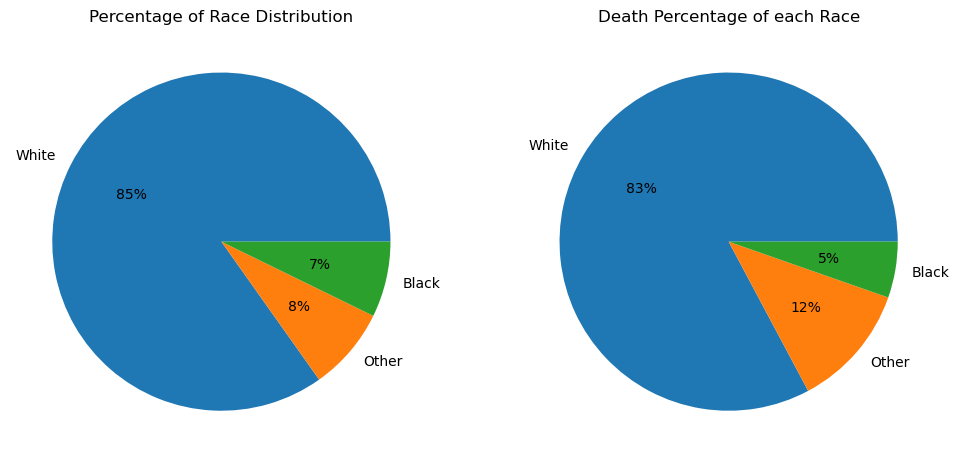

In [10]:
plt.figure(figsize=(12,8));
plt.subplot(1,2,1)
plt.pie(total_count_of_each_race, labels = df_verOne['race'].value_counts().index, autopct='%.0f%%', );
plt.title("Percentage of Race Distribution");


plt.subplot(1,2,2)
plt.pie(death_count_of_each_race, labels = df_verOne['race'].value_counts().index, autopct='%.0f%%', );
plt.title("Death Percentage of each Race");

<b> Q1 - b </b>

In [11]:
descriptive_stats_of_data = round(df_verOne.describe().T,2)
descriptive_stats_of_data

,count,mean,std,min,25%,50%,75%,max
age,4023.0,53.97,8.96,30.0,47.0,54.0,61.0,69.0
tumor_size,4017.0,30.43,21.16,0.0,16.0,25.0,38.0,140.0
regional_node_examined,4023.0,14.36,8.10,1.0,9.0,14.0,19.0,61.0
regional_node_positive,4023.0,4.16,5.11,1.0,1.0,2.0,5.0,46.0
survival_months,4016.0,71.18,23.09,0.0,56.0,73.0,90.0,107.0


<p><b>Age:</b></p>
<p>    The average age of the patients is almost 54 years old. 25% of the patients are below 47 years of age, whereas 75% of the patients are above 61. The Maximum age of the patient is 69</p>
<p><b>tumor_size:</b></p>
<p>    The average tumour size among the patients was found to be 30.42. The minimum size of the tumour is 0mm and the maximum size is 140mm.25% of the patients had a tumor size of less that 16mm while 25% of the patients had tumor size of greater than 38mm.</p>
<p><b>regional_node_examined and regional_node_positive:</b></p>
<p>    The average of 14.36 patients had their regional node examined, out of which it returned positive for 4.16 of the patients. The maximum of the regional nodes that were examined are 75. And the maximum that came back positive are 46</p>
<p><b>survival_months: </b></p>
<p>    The average number of months that patients survived after being diagnosed is 71. 25% of the patients survived for less than 56 months whereas 90% of the patients survived for 90 months. The maximum time that any patient survived is 107 months, which are approximately 9 years</p>

<b>Q1 - c</b>

In [12]:
numerical_columns = df_verOne.select_dtypes(include = [np.number])
skew_and_kurtosis = round(numerical_columns.agg(['skew','kurtosis']).T,2)
skew_and_kurtosis

,skew,kurtosis
age,-0.22,-0.75
tumor_size,1.74,3.62
regional_node_examined,0.83,1.65
regional_node_positive,2.70,8.98
survival_months,-0.61,0.07


/home/ahmedhanifc/miniconda3/envs/learningDSAI/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ahmedhanifc/miniconda3/envs/learningDSAI/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ahmedhanifc/miniconda3/envs/learningDSAI/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ahmedhanifc/miniconda3/envs/learningDSAI/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: F

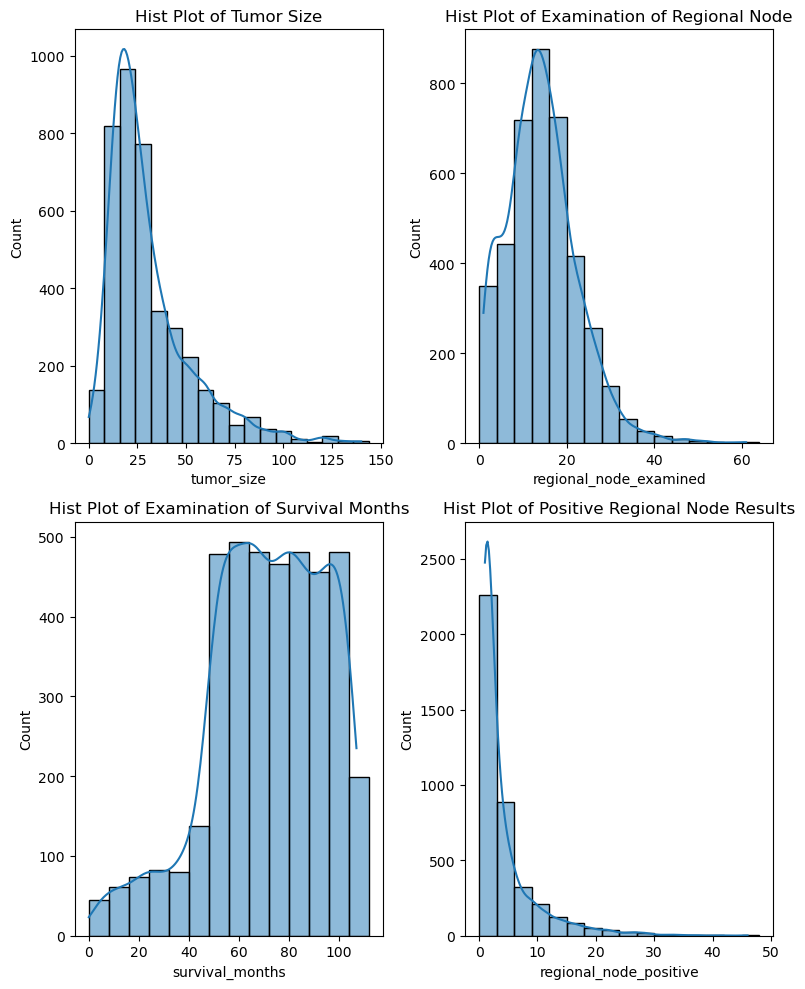

In [13]:
plt.figure(figsize=(8,10))
plt.subplot(2,2,1)
sb.histplot(numerical_columns.tumor_size, kde= True, bins = calculate_bin_edges(numerical_columns.tumor_size,8));
plt.title('Hist Plot of Tumor Size');

plt.subplot(2,2,2)
sb.histplot(numerical_columns.regional_node_examined, kde = True,bins = calculate_bin_edges(numerical_columns.regional_node_examined,4))
plt.title('Hist Plot of Examination of Regional Node')

plt.subplot(2,2,3)
sb.histplot(numerical_columns.survival_months, kde = True, bins = calculate_bin_edges(numerical_columns.survival_months,8))
plt.title('Hist Plot of Examination of Survival Months')

plt.subplot(2,2,4)
sb.histplot(numerical_columns.regional_node_positive, kde = True, bins = calculate_bin_edges(numerical_columns.regional_node_positive,3))
plt.title('Hist Plot of Positive Regional Node Results')

plt.tight_layout();

<b> Comments of the Results </b>

<b> Q2 </b>

In [14]:
medical_variables = ['t_stage', 'n_stage', 'sixth_stage','differentiate','grade','a_stage','tumor_size','estrogen_status','progesterone_status','regional_node_examined','regional_node_positive' ]
dead_patients = df_verOne[df_verOne['status'] == 'Dead']

<Axes: xlabel='race', ylabel='count'>

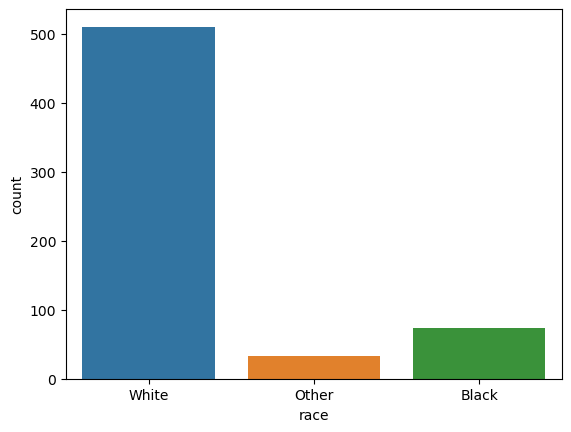

In [15]:
sb.countplot(data = dead_patients, x = 'race')

<Axes: xlabel='marital_status', ylabel='count'>

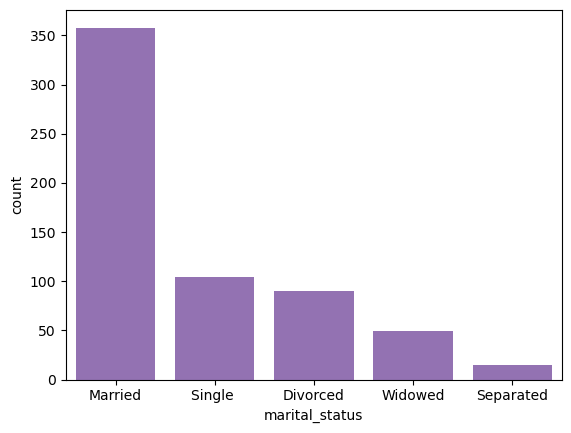

In [16]:
type_order = dead_patients['marital_status'].value_counts().index
color = sb.color_palette()[4]
sb.countplot(dead_patients,x = 'marital_status', order = type_order, color = color)

<b>Q3 - Multivariate Plots</b>

<b> a </b>

In [17]:
numerical_columns.corr()

,age,tumor_size,regional_node_examined,regional_node_positive,survival_months
age,1.000000,-0.077240,-0.033186,0.012743,-0.010449
tumor_size,-0.077240,1.000000,0.105703,0.242640,-0.089535
regional_node_examined,-0.033186,0.105703,1.000000,0.411520,-0.023050
regional_node_positive,0.012743,0.242640,0.411520,1.000000,-0.133725
survival_months,-0.010449,-0.089535,-0.023050,-0.133725,1.000000


<Axes: >

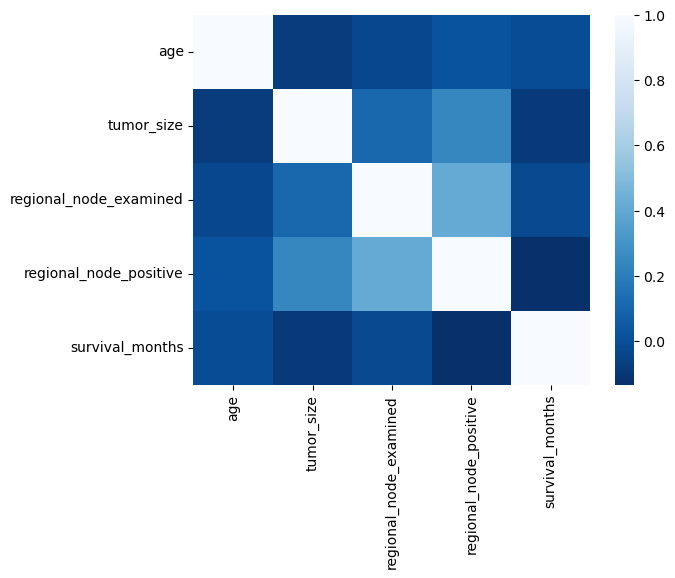

In [18]:
sb.heatmap(data = numerical_columns.corr(), cmap = 'Blues_r')

<b> Important Findings </b>
<ul>
    <li>There is a negative correlation between Survival Month and Tumor Size. This means that the greater tumour size you have, the less number of months you will survive</li>
    <li>
        There is a slight negative correlation between survival months and your regional node test coming back positive
    </li>
    <li>
        There is a slight positive link b/w you examining your regional node and it coming back positive. Likewise with your regional node coming back positive and tumor size
    </li>
</ul>

In [19]:
norm_tumour_size = normalize(numerical_columns['tumor_size'])
norm_survival_months = normalize(numerical_columns['survival_months'])

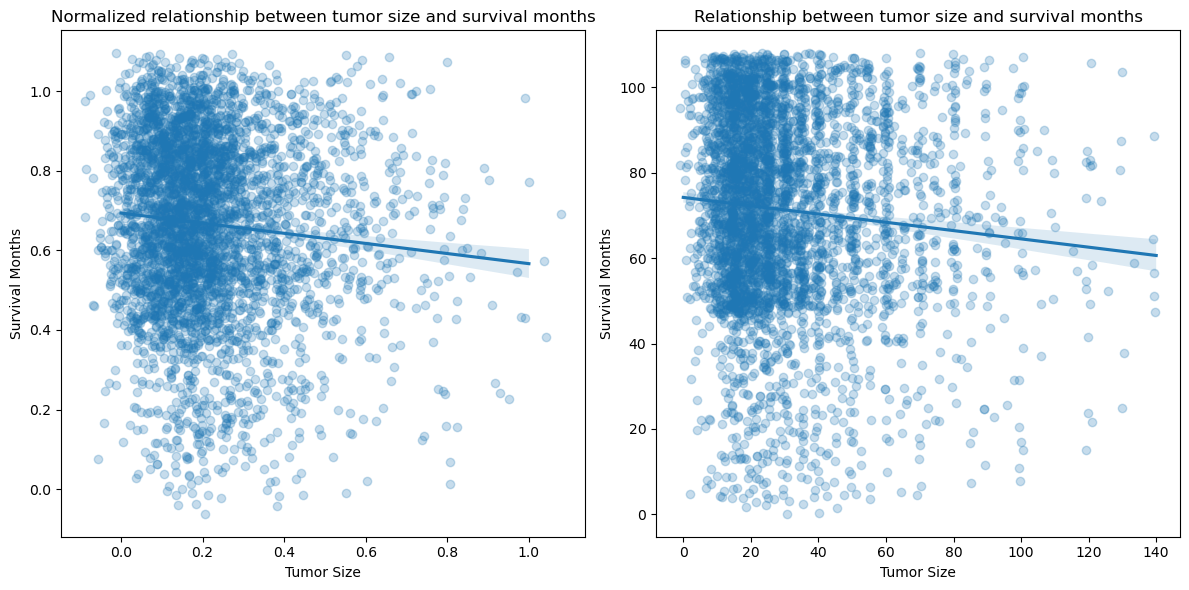

In [20]:
fig, ax = plt.subplots(1,2, figsize = (12,6))

sb.regplot(data = numerical_columns,x = norm_tumour_size, y = norm_survival_months, x_jitter= 0.1, y_jitter=0.1, scatter_kws= {'alpha': 1/4}, ax=ax[0])
ax[0].set_title('Normalized relationship between tumor size and survival months')
ax[0].set_ylabel('Survival Months')
ax[0].set_xlabel('Tumor Size')

sb.regplot(x = numerical_columns['tumor_size'], y = numerical_columns['survival_months'], x_jitter= 1, y_jitter=1, scatter_kws= {'alpha': 1/4}, ax = ax[1])
ax[1].set_title('Relationship between tumor size and survival months')
ax[1].set_ylabel('Survival Months')
ax[1].set_xlabel('Tumor Size')

plt.tight_layout()

<b>b</b>

In [21]:
# df_onlyMarried = df_verOne[df_verOne['marital_status'] == 'Married']
df_verOne['marital_status'].value_counts()
df_verOne[['marital_status', 'status']]

,marital_status,status
0,Married,Alive
1,Married,Alive
2,Divorced,Alive
3,Married,Alive
4,Married,Alive
...,...,...
4019,Married,Alive
4020,Divorced,Alive
4021,Married,Alive
4022,Divorced,Alive


In [22]:
df_verOne.groupby('marital_status')['status'].value_counts()

marital_status  status
Divorced        Alive      396
                Dead        90
Married         Alive     2284
                Dead       358
Separated       Alive       30
                Dead        15
Single          Alive      511
                Dead       104
Widowed         Alive      186
                Dead        49
Name: count, dtype: int64

<b> Q4 - Identifying and Removing Outliers </b>

In [23]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df['column'].quantile(0.25)
        Q3 = df['column'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df
df_verTwo = df_verOne.copy()

In [24]:
numerical_columns.columns.tolist()

['age',
 'tumor_size',
 'regional_node_examined',
 'regional_node_positive',
 'survival_months']

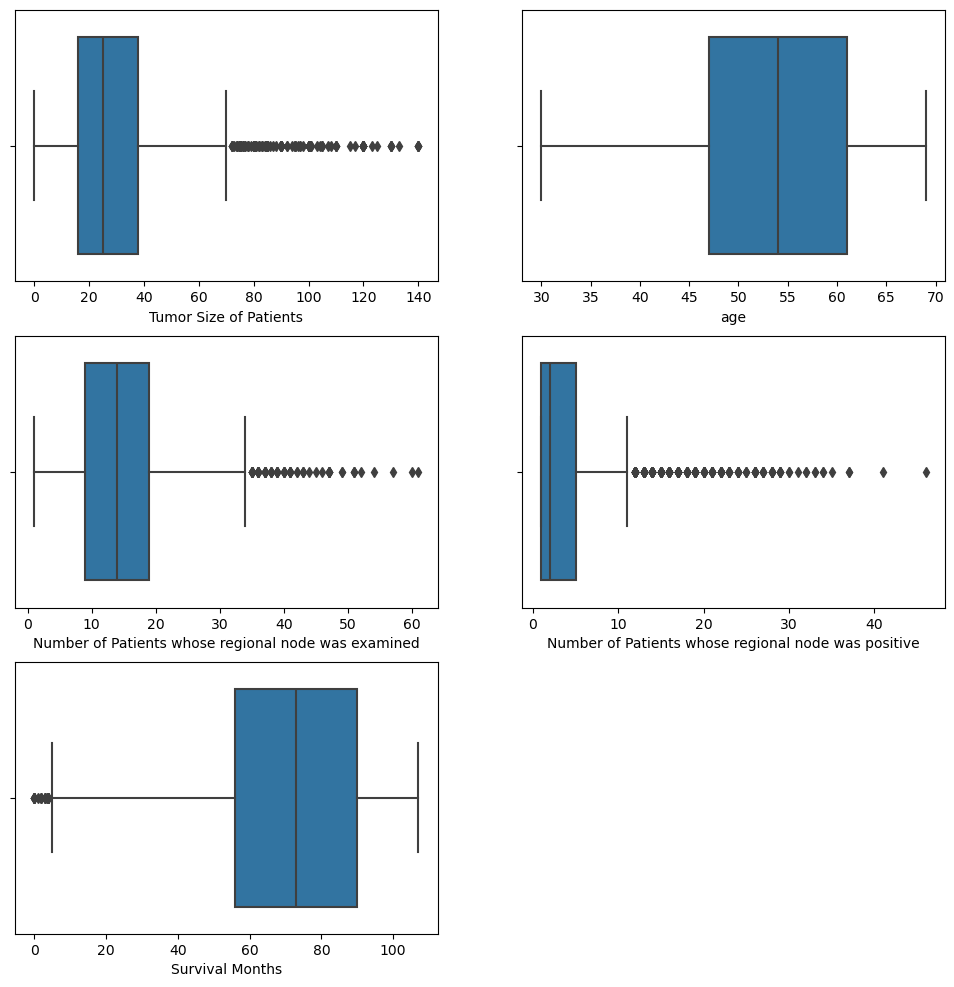

In [25]:
fig, ax = plt.subplots(3,2, figsize = (12,12))
sb.boxplot(data = df_verTwo, x = df_verTwo['tumor_size'], ax=ax[0, 0])
ax[0,0].set_xlabel('Tumor Size of Patients')

sb.boxplot(data = df_verTwo, x = df_verTwo['age'], ax = ax[0,1])
sb.boxplot(data = df_verTwo, x = df_verTwo['regional_node_examined'], ax = ax[1,0])
ax[1,0].set_xlabel('Number of Patients whose regional node was examined')
sb.boxplot(data = df_verTwo, x = df_verTwo['regional_node_positive'], ax = ax[1,1])
ax[1,1].set_xlabel('Number of Patients whose regional node was positive')
sb.boxplot(data = df_verTwo, x = df_verTwo['survival_months'], ax = ax[2,0])
ax[2,0].set_xlabel('Survival Months')

ax[2,1].axis('off');

In [26]:
from scipy.stats.mstats import winsorize
# df_verTwo['tumor_size'] = winsorize(df_verTwo['tumor_size'], limits=[0.08,0.08]) #8% top and 8% bottom replaced by 92th and 8th percentile respectively
df_verTwo['regional_node_examined'] = winsorize(df_verTwo['regional_node_examined'], limits = [0,0.1])
df_verTwo['regional_node_positive'] = winsorize(df_verTwo['regional_node_positive'], limits = [0,0.1])
df_verTwo['survival_months'] = winsorize(df_verTwo['survival_months'], limits = [0.05,0])

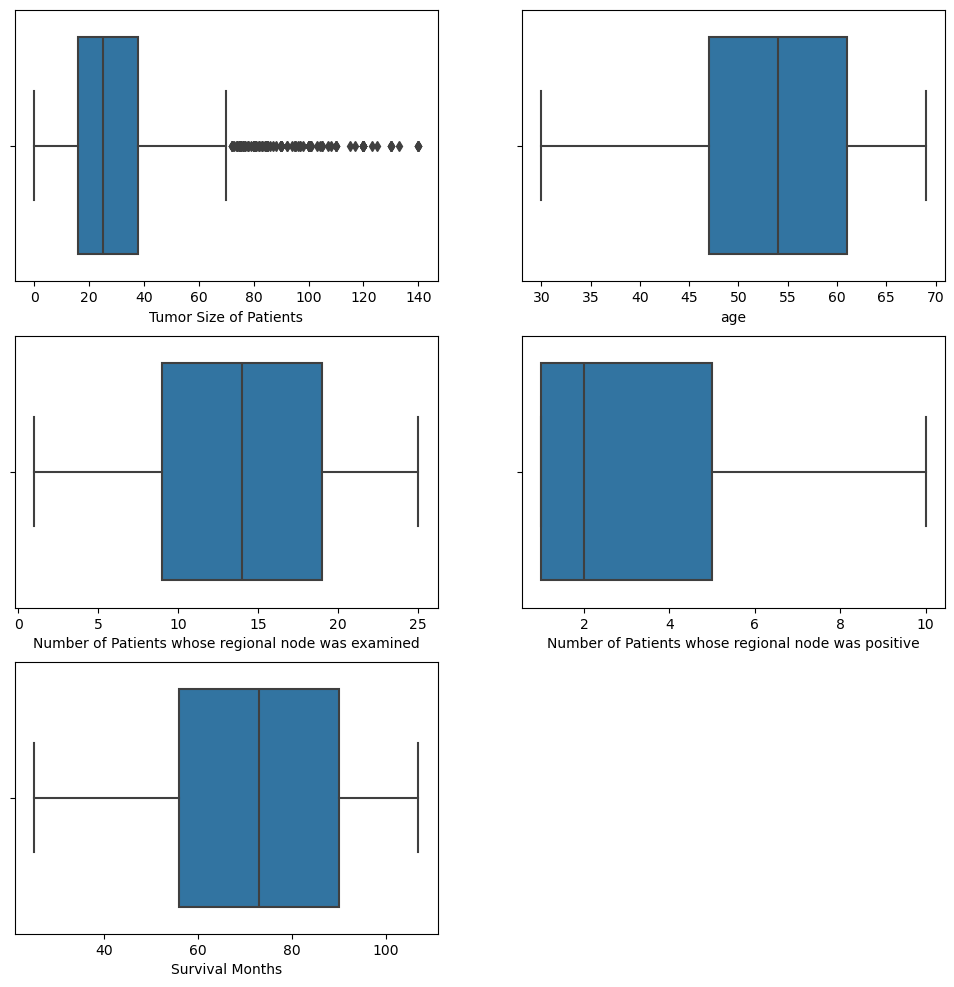

In [27]:
fig, ax = plt.subplots(3,2, figsize = (12,12))
sb.boxplot(data = df_verTwo, x = df_verTwo['tumor_size'], ax=ax[0, 0])
ax[0,0].set_xlabel('Tumor Size of Patients')

sb.boxplot(data = df_verTwo, x = df_verTwo['age'], ax = ax[0,1])
sb.boxplot(data = df_verTwo, x = df_verTwo['regional_node_examined'], ax = ax[1,0])
ax[1,0].set_xlabel('Number of Patients whose regional node was examined')
sb.boxplot(data = df_verTwo, x = df_verTwo['regional_node_positive'], ax = ax[1,1])
ax[1,1].set_xlabel('Number of Patients whose regional node was positive')
sb.boxplot(data = df_verTwo, x = df_verTwo['survival_months'], ax = ax[2,0])
ax[2,0].set_xlabel('Survival Months')

ax[2,1].axis('off');

<b>Q5 - Treating Missing Values</b>

In [28]:
df_verTwo.isna().sum()

age                       0
race                      0
marital_status            0
t_stage                   5
n_stage                   0
sixth_stage               0
differentiate             6
grade                     0
a_stage                   0
tumor_size                6
estrogen_status           0
progesterone_status       0
regional_node_examined    0
regional_node_positive    0
survival_months           7
status                    0
dtype: int64

In [29]:
df_verTwo['t_stage'] = df_verTwo['t_stage'].fillna(df_verTwo['t_stage'].mode().iat[0])
df_verTwo['differentiate'] = df_verTwo['differentiate'].fillna(df_verTwo['differentiate'].mode().iat[0])
df_verTwo['survival_months'] = df_verTwo['survival_months'].fillna(df_verTwo['survival_months'].mean())
df_verTwo.isna().sum().sum()

6

<b>Q6 - Impute Zeroes</b>

In [30]:
# '0' in df_verTwo['progesterone_status'][df_verTwo['progesterone_status'] == '0'].values.astype('int')

In [31]:
columns = df_verTwo.columns.tolist()
toImpute = []
for column in columns:
    if '0' in (df_verTwo[column][(df_verTwo[column] == '0') | (df_verTwo[column] == 0)].values).astype('str'):
        toImpute.append(column)
print(df_verTwo[toImpute].value_counts())
df_verTwo[toImpute] = df_verTwo[toImpute].replace('0','Negative')
print('After Imputing:','0' in df_verTwo[toImpute][df_verTwo[toImpute] == '0'].values.astype('str'))

progesterone_status
Positive               3321
Negative                697
0                         5
Name: count, dtype: int64
After Imputing: False


<div>
    <b> Explanation </b>
    <ul>
        <li>
                <p> progesterone_status column has three types of values. Since the negative value already exists, we don't have a need for the '0' value as they both represent the same thing. Hence, we will be imputing that with negative </p>
        </li>

</div>


In [32]:
df_verOne[['t_stage', 'tumor_size']]

,t_stage,tumor_size
0,T1,4.0
1,T2,35.0
2,T3,63.0
3,T1,18.0
4,T2,41.0
...,...,...
4019,T1,9.0
4020,T2,46.0
4021,T2,22.0
4022,T2,44.0


In [33]:
df_verTwo[['t_stage', 'tumor_size']][df_verTwo['tumor_size'] == 0].size

12

<p>Tumor from stage 1 onwards don't have a tumor size of zero. Hence we will be imputing these values</p>(Breast Cancer Tumor Size Chart & Measurement Explained, n.d.)

In [34]:
df_verTwo['tumor_size'] = winsorize(df_verTwo['tumor_size'], limits = [0.08,0.08])
df_verTwo[['t_stage', 'tumor_size']][df_verTwo['tumor_size'] == 0].size

0

In [35]:
df_verTwo['progesterone_status'].unique()

array(['Positive', 'Negative'], dtype=object)

<b> Q7 - Rescale </b>

In [36]:
df_verThree = df_verTwo.copy()

print(df_verThree['grade'].unique())
df_verThree['grade'] = df_verThree['grade'].replace(' anaplastic; Grade IV', '4')
print('After Replacing:',df_verThree['grade'].unique())


type_of_object_columns = df_verThree.select_dtypes(include = ['object'])
df_verThree[type_of_object_columns.columns.tolist()]=df_verThree[type_of_object_columns.columns.tolist()].astype('category')
# df_verThree['status'] = df_verThree['status'].str.replace('Alive', '1').str.replace('Dead', '0')
# df_verThree['status'] = df_verThree['status'].astype('int')
df_verThree['status'] = df_verThree['status'].cat.codes


df_verThree['estrogen_status'] = df_verThree['estrogen_status'].cat.codes
df_verThree['progesterone_status'] = df_verThree['progesterone_status'].cat.codes

df_verThree['a_stage'] = df_verThree['a_stage'].cat.codes

df_verThree['tumor_size'] = round(normalize(df_verThree['tumor_size']),2)
df_verThree['survival_months'] = round(normalize(df_verThree['survival_months']),2)

df_verFour = df_verThree.copy()
df_verFour = pd.get_dummies(df_verThree, prefix = ['differentiate', 'marital_status', 't_stage','sixth_stage'], columns = ['differentiate', 'marital_status', 't_stage','sixth_stage'])



['3' '2' '1' ' anaplastic; Grade IV']
After Replacing: ['3' '2' '1' '4']


In [37]:
df_verFour.sample(5)

,age,race,n_stage,grade,a_stage,tumor_size,estrogen_status,progesterone_status,regional_node_examined,regional_node_positive,...,marital_status_Widowed,t_stage_T1,t_stage_T2,t_stage_T3,t_stage_T4,sixth_stage_IIA,sixth_stage_IIB,sixth_stage_IIIA,sixth_stage_IIIB,sixth_stage_IIIC
1894,67,White,N1,3,1,0.09,1,1,20,1,...,False,True,False,False,False,True,False,False,False,False
2165,45,White,N2,2,1,1.00,1,0,21,4,...,False,False,False,True,False,False,False,True,False,False
1987,60,White,N1,3,1,0.26,0,0,10,1,...,False,False,True,False,False,False,True,False,False,False
720,48,White,N2,2,1,0.26,1,0,14,4,...,False,False,True,False,False,False,False,True,False,False
3452,49,Other,N2,3,1,0.26,1,1,23,5,...,False,False,True,False,False,False,False,True,False,False


In [38]:
df_verFour.columns = df_verFour.columns.str.replace(' ','_').str.lower()

In [39]:
columns = df_verFour.columns.tolist()
r_one = re.compile('differentiate*')
differentiate_columns = list(filter(r_one.match, columns)) #(Regular Expressions: Search in List, n.d.)
print(differentiate_columns)

r_two = re.compile('marital_status*')
relationship_status_columns = list(filter(r_two.match, columns))
print(relationship_status_columns)

r_three = re.compile('t_stage*')
t_stage_columns = list(filter(r_three.match,columns))
print(t_stage_columns)

# r_four = re.compile('n_stage*')
# n_stage_columns = list(filter(r_four.match, columns))
# print(n_stage_columns)

r_five = re.compile('sixth_stage*')
sixth_stage_columns = list(filter(r_five.match, columns))
print(sixth_stage_columns)


['differentiate_moderately_differentiated', 'differentiate_poorly_differentiated', 'differentiate_undifferentiated', 'differentiate_well_differentiated']
['marital_status_divorced', 'marital_status_married', 'marital_status_separated', 'marital_status_single_', 'marital_status_widowed']
['t_stage_t1', 't_stage_t2', 't_stage_t3', 't_stage_t4']
['sixth_stage_iia', 'sixth_stage_iib', 'sixth_stage_iiia', 'sixth_stage_iiib', 'sixth_stage_iiic']


In [40]:
df_verThree['a_stage'].unique()

array([1, 0], dtype=int8)

In [41]:
relevant_columns = differentiate_columns + ['grade', 'tumor_size', 'survival_months','status']
df_verFour.groupby('status')[['tumor_size','survival_months']].corr()

tumor_size  survival_months
status                                             
0      tumor_size         1.000000        -0.027701
       survival_months   -0.027701         1.000000
1      tumor_size         1.000000        -0.089172
       survival_months   -0.089172         1.000000

<Axes: xlabel='tumor_size', ylabel='survival_months'>

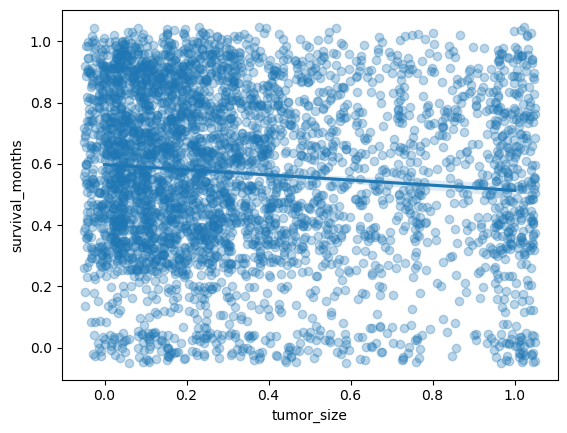

In [42]:
sb.regplot(x = df_verFour['tumor_size'], y = df_verFour['survival_months'], x_jitter=0.05, y_jitter=0.05, scatter_kws={'alpha': 0.3})

<ul>
<li><b>Label Encoding:</b> Changing Categorical Type into Numerical in order to feed to the model later down the road</li>
    <ul>
        <li>
            <b>Status:</b> Alive = 1, Dead = 0
        </li>
        <li>
            <b>Progesterone Status:</b> Positive = 1, Negative = 0
        </li>
        <li>
            <b>Estrogen Status:</b> Positive = 1, Negative = 0
        </li>
        <li>
            <b>a_stage:</b> Regional = 1, Distant = 0
        </li>
    </ul>
<li>
    <b>Normalizing:</b> Converting Values to a similar scale in order to improve the efficiency of the model
    <ul>
        <li>
            <b>Tumor Size</b>
        </li>
        <li>
            <b>Survival Months</b     
        </li>
    </ul>
</li>
</ul>

<b>Q8 - Feature Engineering and Feature Removal</b>

In [43]:
df_verFive = df_verFour.copy()
df_verFive['survival_chance'] = (df_verFive['tumor_size'] * df_verFive['survival_months']) * 100

feature_removal = ['estrogen_status', 'progesterone_status', 'n_stage', 'race']
df_verFive.drop(columns = feature_removal, inplace = True, axis = 1)

df_verFive['status']

0       0
1       0
2       0
3       0
4       0
       ..
4019    0
4020    0
4021    0
4022    0
4023    0
Name: status, Length: 4023, dtype: int8

In [44]:
df_verFive.dtypes

age                                           int64
grade                                      category
a_stage                                        int8
tumor_size                                  float64
regional_node_examined                        int64
regional_node_positive                        int64
survival_months                             float64
status                                         int8
differentiate_moderately_differentiated        bool
differentiate_poorly_differentiated            bool
differentiate_undifferentiated                 bool
differentiate_well_differentiated              bool
marital_status_divorced                        bool
marital_status_married                         bool
marital_status_separated                       bool
marital_status_single_                         bool
marital_status_widowed                         bool
t_stage_t1                                     bool
t_stage_t2                                     bool
t_stage_t3  

------------------------------

<h1>Machine Learning</h1>
<p><b> Classification Problem:</b> Determine if the patient Survived or Not</p>

Splitting Calling Fitting Predicting

<b>Q1 </b>

<b> Test One </b>

In [45]:
test_number_one = differentiate_columns + relationship_status_columns + ['age']

feature_set_one = test_number_one
target_set_one = ['status']
feature_one = df_verFive.loc[:,feature_set_one]
target_one = df_verFive.loc[:,target_set_one]

Xtrain_one, Xtest_one, ytrain_one, ytest_one = train_test_split(
    feature_one,
    target_one,
    test_size=0.3,
    random_state=42
)

model_one = RandomForestClassifier()
model_one.fit(Xtrain_one, ytrain_one)
ypredict_one = model_one.predict(Xtest_one)

accuracy_one = accuracy_score(ytest_one, ypredict_one)
matrix_one = confusion_matrix(ytest_one, ypredict_one)
precision_one = precision_score(ytest_one, ypredict_one, average='weighted', labels = np.unique(ypredict_one))
recall_one = recall_score(ytest_one, ypredict_one, average='weighted', labels = np.unique(ypredict_one))
f1_one = f1_score(ytest_one, ypredict_one, average='weighted', labels = np.unique(ypredict_one))

score_summary = {'Accuracy':round(accuracy_one,2), 'Precision':round(precision_one,2), 'Recall': round(recall_one,2), 'F1': round(f1_one,2)}

fpr_one, tpr_one, threshold_one = roc_curve(ytest_one, ypredict_one)
roc_auc_one = auc(fpr_one, tpr_one)


for key, value in score_summary.items():
    print(f'{key} Score is: {value}')
print(matrix_one)


/home/ahmedhanifc/miniconda3/envs/learningDSAI/lib/python3.12/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy Score is: 0.83
Precision Score is: 0.75
Recall Score is: 0.83
F1 Score is: 0.78
[[991  27]
 [180   9]]


<b> Test Two </b>

In [46]:
test_number_two = relationship_status_columns 

feature_set_two = test_number_two
target_set_two = ['status']
feature_two = df_verFive.loc[:,feature_set_two]
target_two = df_verFive.loc[:,target_set_two]

Xtrain_two, Xtest_two, ytrain_two, ytest_two = train_test_split(
    feature_two,
    target_two,
    test_size=0.3,
    random_state=42
)

model_two = LogisticRegression()
model_two.fit(Xtrain_two, ytrain_two)
ypredict_two = model_two.predict(Xtest_two)

accuracy_two = accuracy_score(ytest_two, ypredict_two)
matrix_two = confusion_matrix(ytest_two, ypredict_two)
precision_two = precision_score(ytest_two, ypredict_two, average='weighted', labels = np.unique(ypredict_two))
recall_two = recall_score(ytest_two, ypredict_two, average='weighted', labels = np.unique(ypredict_two))
f1_two = f1_score(ytest_two, ypredict_two, average='weighted', labels = np.unique(ypredict_two))


fpr_two, tpr_two, threshold_two = roc_curve(ytest_two, ypredict_two)
roc_auc_two = auc(fpr_two, tpr_two)

score_summary = {'Accuracy':round(accuracy_two,2), 'Precision':round(precision_two,2), 'Recall': round(recall_two,2), 'F1': round(f1_two,2)}

for key, value in score_summary.items():
    print(f'{key} Score is: {value}')
print(matrix_two)


Accuracy Score is: 0.84
Precision Score is: 0.84
Recall Score is: 1.0
F1 Score is: 0.92
[[1018    0]
 [ 189    0]]


/home/ahmedhanifc/miniconda3/envs/learningDSAI/lib/python3.12/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
[column for column in df_verFive.columns if not ]

SyntaxError: invalid syntax (3235111990.py, line 1)

<b> Test 3 </B>

In [ ]:
test_number_three = differentiate_columns + sixth_stage_columns + t_stage_columns + ['age'] + ['survival_chance']

feature_set_three = test_number_three
target_set_three = ['status']
feature_three = df_verFive.loc[:,feature_set_three]
target_three = df_verFive.loc[:,target_set_three]

Xtrain_three, Xtest_three, ytrain_three, ytest_three = train_test_split(
    feature_three,
    target_three,
    test_size=0.3,
    random_state=42
)

model_three = GaussianNB()
model_three.fit(Xtrain_three, ytrain_three)
ypredict_three = model_three.predict(Xtest_three)

accuracy_three = accuracy_score(ytest_three, ypredict_three)
matrix_three = confusion_matrix(ytest_three, ypredict_three)
precision_three = precision_score(ytest_three, ypredict_three, average='weighted', labels = np.unique(ypredict_three))
recall_three = recall_score(ytest_three, ypredict_three, average='weighted', labels = np.unique(ypredict_three))
f1_three = f1_score(ytest_three, ypredict_three, average='weighted', labels = np.unique(ypredict_three))

fpr_three, tpr_three, threshold_three = roc_curve(ytest_three, ypredict_three)
roc_auc_three = auc(fpr_three, tpr_three)

score_summary = {'Accuracy':round(accuracy_three,2), 'Precision':round(precision_three,2), 'Recall': round(recall_three,2), 'F1': round(f1_three,2)}

for key, value in score_summary.items():
    print(f'{key} Score is: {value}')
print(matrix_three)



<b> Test 4 </B>

In [ ]:
test_number_four = sixth_stage_columns + t_stage_columns + differentiate_columns + ['survival_chance']

feature_set_four = test_number_four
target_set_four = ['status']
feature_four = df_verFive.loc[:,feature_set_four]
target_four = df_verFive.loc[:,target_set_four]

Xtrain_four, Xtest_four, ytrain_four, ytest_four = train_test_split(
    feature_four,
    target_four,
    test_size=0.3,
    random_state=42
)

model_four = SVC(kernel='linear')
model_four.fit(Xtrain_four, ytrain_four)
ypredict_four = model_four.predict(Xtest_four)

accuracy_four = accuracy_score(ytest_four, ypredict_four)
matrix_four = confusion_matrix(ytest_four, ypredict_four)
precision_four = precision_score(ytest_four, ypredict_four, average='weighted', labels = np.unique(ypredict_four))
recall_four = recall_score(ytest_four, ypredict_four, average='weighted', labels = np.unique(ypredict_four))
f1_four = f1_score(ytest_four, ypredict_four, average='weighted', labels = np.unique(ypredict_four))


fpr_four, tpr_four, threshold_four = roc_curve(ytest_four, ypredict_four)
roc_auc_four = auc(fpr_four, tpr_four)


score_summary = {'Accuracy':round(accuracy_three,2), 'Precision':round(precision_three,2), 'Recall': round(recall_three,2), 'F1': round(f1_three,2)}

for key, value in score_summary.items():
    print(f'{key} Score is: {value}')
print(matrix_four)


------------

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (10,6))

sb.heatmap(matrix_one, cmap = 'Blues_r', annot=True, fmt ='d', ax= ax[0,0])
ax[0,0].set_xlabel('Predicted Death Event')
ax[0,0].set_ylabel('Actual Death Event')
ax[0,0].set_title('Estimating Death Event using Random Forest Classifier')

sb.heatmap(matrix_two, cmap = 'Blues_r', annot=True, fmt ='d', ax= ax[0,1])
ax[0,1].set_xlabel('Predicted Death Event')
ax[0,1].set_ylabel('Actual Death Event')
ax[0,1].set_title('Estimating Death Event using Logistic Regression')

sb.heatmap(matrix_three, cmap = 'Blues_r', annot=True, fmt ='d', ax= ax[1,0])
ax[1,0].set_xlabel('Predicted Death Event')
ax[1,0].set_ylabel('Actual Death Event')
ax[1,0].set_title('Estimating Death Event using Gaussian Naive Bayes')

sb.heatmap(matrix_four, cmap = 'Blues_r', annot=True, fmt ='d', ax= ax[1,1])
ax[1,1].set_xlabel('Predicted Death Event')
ax[1,1].set_ylabel('Actual Death Event')
ax[1,1].set_title('Estimating Death Event using SVC')

plt.tight_layout()

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.plot(fpr_one, tpr_one, label = 'AUC = %0.2f' % roc_auc_one)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC) of Random Forest Classifier')
plt.legend(loc = 'lower right')

plt.subplot(2,2,2)
plt.plot(fpr_two, tpr_two, label = 'AUC = %0.2f' % roc_auc_two)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC) of Logistic Regression')
plt.legend(loc = 'lower right')

plt.subplot(2,2,3)
plt.plot(fpr_three, tpr_three, label = 'AUC = %0.2f' % roc_auc_three)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC) of Gaussian Naive Bayes')
plt.legend(loc = 'lower right')

plt.subplot(2,2,4)
plt.plot(fpr_four, tpr_four, label = 'AUC = %0.2f' % roc_auc_four)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC) of SVC')
plt.legend(loc = 'lower right')

plt.tight_layout()
plt.show()

<h2> Classification Model: Explanation </h2>

<div>
    <p><b>Interpretation</b></p>
    <ul>
        <li>True Positive</li>
        <li>False Positive</li>
        <li>False Negative</li>
        <li>True Negative</li>
    </ul>
</div>


<p><b>Regression Problem:</b> Number of survival months remaining for patients</p>

<b>Test One</b>

In [ ]:
df_verSix = df_verFive.copy()
df_verSix['survival_months'] = denormalize(original=df_verOne['survival_months'], normalized= df_verFive['survival_months'])

In [ ]:
reg_test_number_one = relationship_status_columns + ['age', 'survival_chance'] + t_stage_columns

reg_feature_set_one = reg_test_number_one
reg_target_set_one = ['survival_months']
reg_feature_one = df_verSix.loc[:,reg_feature_set_one]
reg_target_one = df_verSix.loc[:,reg_target_set_one]

reg_Xtrain_one, reg_Xtest_one, reg_ytrain_one, reg_ytest_one = train_test_split(
    reg_feature_one,
    reg_target_one,
    test_size=0.3,
    random_state=42
)

reg_model_one = GradientBoostingRegressor()
reg_model_one.fit(reg_Xtrain_one, reg_ytrain_one)
reg_ypredict_one = reg_model_one.predict(reg_Xtest_one)

r2_score_one = r2_score(reg_ytest_one, reg_ypredict_one)
mse_one = mean_squared_error(reg_ytest_one, reg_ypredict_one)
rmse_one = np.sqrt(mse_one)


score_summary = {'R2 Score':round(r2_score_one,2), 'Mean Squared Error:':round(mse_one,2), 'Root Mean Squared Error:': round(rmse_one,2)}

for key, value in score_summary.items():
    print(f'{key} Score is: {value}')


<b> Test Two </b>

In [ ]:
[column for column in df_verFive.columns if column == 'survival_months']

In [ ]:
reg_test_number_two = [column for column in df_verSix.columns if not column == 'survival_months']

reg_feature_set_two = reg_test_number_two
reg_target_set_two = [column for column in df_verSix.columns if column == 'survival_months']
reg_feature_two = df_verSix.loc[:,reg_feature_set_two]
reg_target_two = df_verSix.loc[:,reg_target_set_two]

reg_Xtrain_two, reg_Xtest_two, reg_ytrain_two, reg_ytest_two = train_test_split(
    reg_feature_two,
    reg_target_two,
    test_size=0.3,
    random_state=42
)

reg_model_two = PoissonRegressor()
reg_model_two.fit(reg_Xtrain_two, reg_ytrain_two)
reg_ypredict_two = reg_model_two.predict(reg_Xtest_two)

r2_score_two = r2_score(reg_ytest_two, reg_ypredict_two)
mse_two = mean_squared_error(reg_ytest_two, reg_ypredict_two)
rmse_two = np.sqrt(mse_two)


score_summary = {'R2 Score':round(r2_score_two,2), 'Mean Squared Error:':round(mse_two,2), 'Root Mean Squared Error:': round(rmse_two,2)}

for key, value in score_summary.items():
    print(f'{key} Score is: {value}')


<b> Test Three </b>

In [ ]:
reg_test_number_three = [column for column in df_verSix.columns if not column == 'survival_months']

reg_feature_set_three = reg_test_number_three
reg_target_set_three = [column for column in df_verSix.columns if column == 'survival_months']
reg_feature_three = df_verSix.loc[:,reg_feature_set_three]
reg_target_three = df_verSix.loc[:,reg_target_set_three]

reg_Xtrain_three, reg_Xtest_three, reg_ytrain_three, reg_ytest_three = train_test_split(
    reg_feature_three,
    reg_target_three,
    test_size=0.3,
    random_state=42
)

reg_model_three = RandomForestQuantileRegressor()
reg_model_three.fit(reg_Xtrain_three, reg_ytrain_three)
reg_ypredict_three = reg_model_three.predict(reg_Xtest_three)

r2_score_three = r2_score(reg_ytest_two, reg_ypredict_three)
mse_three = mean_squared_error(reg_ytest_three, reg_ypredict_three)
rmse_three = np.sqrt(mse_three)

score_summary = {'R2 Score':round(r2_score_three,2), 'Mean Squared Error:':round(mse_three,2), 'Root Mean Squared Error:': round(rmse_three,2)}

for key, value in score_summary.items():
    print(f'{key} Score is: {value}')


<b>Plotting a Clustered Bar Chart In Order to Compare the different Models</b>

In [ ]:
r2_score = [r2_score_one,r2_score_two, r2_score_three]
mse_score = [mse_one,mse_two, mse_three]
rmse_score = [rmse_one, rmse_two, rmse_three]

norm_r2_score_one = logtrans(pd.Series(r2_score), inverse=True).tolist()[0]
norm_r2_score_two = logtrans(pd.Series(r2_score), inverse=True).tolist()[1]
norm_r2_score_three = logtrans(pd.Series(r2_score), inverse=True).tolist()[2]

norm_mse_score_one = logtrans(pd.Series(mse_score)).tolist()[0]
norm_mse_score_two = logtrans(pd.Series(mse_score)).tolist()[1]
norm_mse_score_three = logtrans(pd.Series(mse_score)).tolist()[2]

norm_rmse_score_one = logtrans(pd.Series(rmse_score)).tolist()[0]
norm_rmse_score_two = logtrans(pd.Series(rmse_score)).tolist()[1]
norm_rmse_score_three = logtrans(pd.Series(rmse_score)).tolist()[2]


# Normalizing RMSE and MSE score to bring on the same scale as R2 score. Otherwise their values are really imbalancedly scaled

metrics = ['R2 Score', 'Mean Squared Error','Root Mean Squared Error']


values1 = [norm_r2_score_one, norm_mse_score_one, norm_rmse_score_one]
values2 = [norm_r2_score_two, norm_mse_score_two, norm_rmse_score_two]
values3 = [norm_r2_score_three, norm_mse_score_three, norm_rmse_score_three]

# Plotting
plt.figure(figsize=(10, 6))

plt.bar(np.arange(len(metrics)) - 0.2, values1, width=0.2, label='Metrics Set 1')
plt.bar(np.arange(len(metrics)), values2, width=0.2, label='Metrics Set 2')
plt.bar(np.arange(len(metrics)) + 0.2, values3, width=0.2, label='Metrics Set 3')

plt.xticks(np.arange(len(metrics)), metrics)
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Evaluation Metrics')

plt.legend()
plt.show()

<b> Important Note: </b> Higher the MSE and RMSE, the worse the model is performing. The inverse is true for R2 Score

<h2></h2>

<h1> References</h1>

<p>Breast cancer tumor size chart & measurement explained. (n.d.). City of Hope. <a href = 'https://www.cancercenter.com/cancer-types/breast-cancer/stages/tumor-size-chart'>https://www.cancercenter.com/cancer-types/breast-cancer/stages/tumor-size-chart</a> </p>

<p>Regular Expressions: Search in list. (n.d.). Stack Overflow. <a href = ">https://stackoverflow.com/questions/3640359/regular-expressions-search-in-list">https://stackoverflow.com/questions/3640359/regular-expressions-search-in-list </a></p>
<p>Rosen, T. (2021b, December 10). Choosing the right estimator - Tara Rosen - medium. <a href = "https://medium.com/@t.rosen2101/choosing-the-right-estimator-ae054809b693">Medium. https://medium.com/@t.rosen2101/choosing-the-right-estimator-ae054809b693</a></p>
<p> TracyRenee. (n.d.). Misc-Predictions/Denormalise_Destandardise_data.ipynb at main · TracyRenee61/Misc-Predictions. GitHub. <a href = "https://github.com/TracyRenee61/Misc-Predictions/blob/main/Denormalise_Destandardise_data.ipynb">https://github.com/TracyRenee61/Misc-Predictions/blob/main/Denormalise_Destandardise_data.ipynb</a></p>
<p> <a href = ''></a></p>
<p> <a href = ''></a></p>
<p> <a href = ''></a></p>